In [ ]:
import pandas as pd
import csv

file = 'data_test.csv'

df = pd.read_csv(file,delimiter=';')
print(df.head())

df.to_csv("out.csv", index=False)

   id события         ФИО участника события 1          ФИО участника события 2
0         189  Галчевская Карина Владимировна  Белоновская Анастасия Семеновна
1         206         Офицеров Олег Романович        Сапожник Борис Валерьевич
2         445     Жандарова Лариса Германовна       Чемодуров Дамир Русланович
3         503          Масимова Яна Дамировна   Мингажетдинов Рамиль Семенович
4         571       Мухтарова Алена Яковлевна      Щербатенко Ольга Робертовна


In [32]:
len(df.index)

5000

In [ ]:
#Размерность
df.shape

(5000, 3)

In [4]:
df2 = pd.read_csv('russian_names.csv',header=None)
df2 = df2.rename(columns={0: 'surname', 1: 'name', 2: 'father_name', 3: 'sex'})
print(df2.head(10))

     surname      name   father_name sex
0     АБАБИЙ    АНДРЕЙ    ВАСИЛЬЕВИЧ   М
1   АБАБИЛОВ   ДМИТРИЙ    НИКОЛАЕВИЧ   М
2   АБАБИЛОВ  ВЛАДИМИР      ИВАНОВИЧ   М
3   АБАБИЛОВ    СЕРГЕЙ      ИВАНОВИЧ   М
4   АБАБИЛОВ      ЮРИЙ  ВЛАДИМИРОВИЧ   М
5   АБАБИЛОВ   АЛЕКСЕЙ    НИКОЛАЕВИЧ   М
6   АБАБИЛОВ   ВАСИЛИЙ     ФЕДОРОВИЧ   М
7   АБАБИЛОВ    СЕРГЕЙ    ВАСИЛЬЕВИЧ   М
8   АБАБИЛОВ    ЛЕОНИД    АЛЕКСЕЕВИЧ   М
9  АБАБИЛОВА      НИНА      ПЕТРОВНА   Ж


In [ ]:
# Проверяем есть ли пустые значения
pd.isnull(df).sum()

id события                 0
ФИО участника события 1    0
ФИО участника события 2    0
dtype: int64

In [40]:
all_names =[]

for i in range(len(df.index)):
    line = df.iloc[i]['ФИО участника события 1']
    new_line = line.split(' ')
    searched_name = new_line[1]
    searched_name = searched_name.lower()
    all_names.append(searched_name)

In [ ]:
# TODO Распределение имен

In [ ]:
names_sex = df2[['name', 'sex']]
names_dict = names_sex.to_dict(orient='records')

In [58]:
# Ищем совпадения по именам из датасета "Russian (Cyrillic) full names and gender"
# для соотношения полов

### убрать верхнее в маркдавн со ссылкой

gender_ratio = []

for i in all_names:
    for y in range(len(df.index)):
        found_name = names_dict[y].get('name')
        if i == found_name.lower():
            gender_ratio.append(names_dict[y].get('sex'))
            break

# !!! Сделать для второго участника тоже

print(len(gender_ratio))

4596


In [ ]:
unknown = len(df.index) - len(gender_ratio)

In [63]:
males = gender_ratio.count('М')
females = gender_ratio.count('Ж')

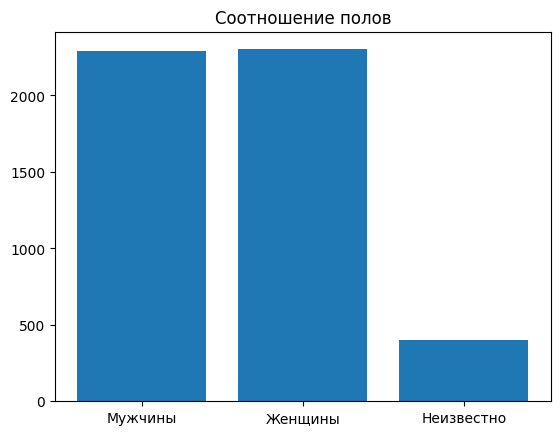

In [65]:
import matplotlib.pyplot as plt


gender = ['Мужчины', 'Женщины', 'Неизвестно']
count = [males, females, unknown]

plt.bar(gender, count)
plt.title("Соотношение полов")

plt.show()

In [9]:
from neo4j import GraphDatabase
import logging
from neo4j.exceptions import ServiceUnavailable
import networkx as nx
import matplotlib.pyplot as plt


# Определение класса
class App:
    # Конструктор класса
    def __init__(self, uri, user, password):
        # Инициализация драйвера Neo4j с переданными параметрами
        self.driver = GraphDatabase.driver(uri, auth=(user, password))        
    # Метод класса для закрытия соединения с базой данных Neo4j
    def close(self):
        # Не забудьте закрыть соединение драйвера, когда закончите работу с ним
        self.driver.close()
    # Метод класса для создания графа
    def create_graph(self):
        with self.driver.session() as session:
            # Выполнение запроса на создание графа
            session.execute_write(self._create_graph)
            
    # Статический метод, который содержит запрос на создание графа 
    @staticmethod
    def _create_graph(tx):
        tx.run("""
        CREATE (A:Store { name: 'A' })
        CREATE (B:Shop { name: 'B' })
        CREATE (C:Store { name: 'C' })
        CREATE (D:Store { name: 'D' })
        CREATE (E:Shop { name: 'E' })
        CREATE (F:Store { name: 'F' })
        CREATE (G:Store { name: 'G' })
        CREATE (H:Shop { name: 'H' })
        CREATE (I:Shop { name: 'I' })
        CREATE (A)-[:way { minutes: 90, km: 10 }]->(B)
        CREATE (B)-[:way { minutes: 80, km: 9 }]->(C)
        CREATE (C)-[:way { minutes: 75, km: 8 }]->(I)
        CREATE (A)-[:way { minutes: 55, km: 6 }]->(D)
        CREATE (D)-[:way { minutes: 35, km: 5 }]->(E)
        CREATE (D)-[:way { minutes: 30, km: 4 }]->(B)
        CREATE (E)-[:way { minutes: 10, km: 2 }]->(I)
        CREATE (A)-[:way { minutes: 60, km: 7 }]->(F)
        CREATE (F)-[:way { minutes: 270, km: 20 }]->(G)
        CREATE (F)-[:way { minutes: 7, km: 1 }]->(E)
        CREATE (G)-[:way { minutes: 40, km: 5 }]->(H)
        CREATE (H)-[:way { minutes: 20, km: 2 }]->(I)
        """)

In [ ]:
# Основная программа
if __name__ == "__main__":
    # Aura запросы используют зашифрованное соединение с использованием схемы URI "neo4j+s"
    uri = "neo4j://127.0.0.1:7687"
    user = "neo4j"
    password = "12345678"
    # Создание экземпляра класса, передача параметров для инициализации драйвера Neo4j
    app = App(uri, user, password)
    # Вызов метода класса для создания графа
    app.create_graph()
    # Закрытие соединения с базой данных Neo4j
    app.close()